In [1]:
import csv 
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df = pd.read_csv('hr_clean_data_2023.csv')

In [3]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'datebirth',
       'remotework'],
      dtype='object')

1. relacionar educacion, con salario
2. gender y salario
3. departamento, educationfield y salario, jobrole
4 .gender y job role
5. age y environment satisfaction
11. worklifebalance y gender, overtime
12. worklifebalance, standarhours, gender

.......................................................

5. job level y age
6. years at company y years in current role
7. percent salary hike y relationshipsatisfaction
9. remote work, job role
10. business travel y job role
13. stock option leve, job level, years at company 



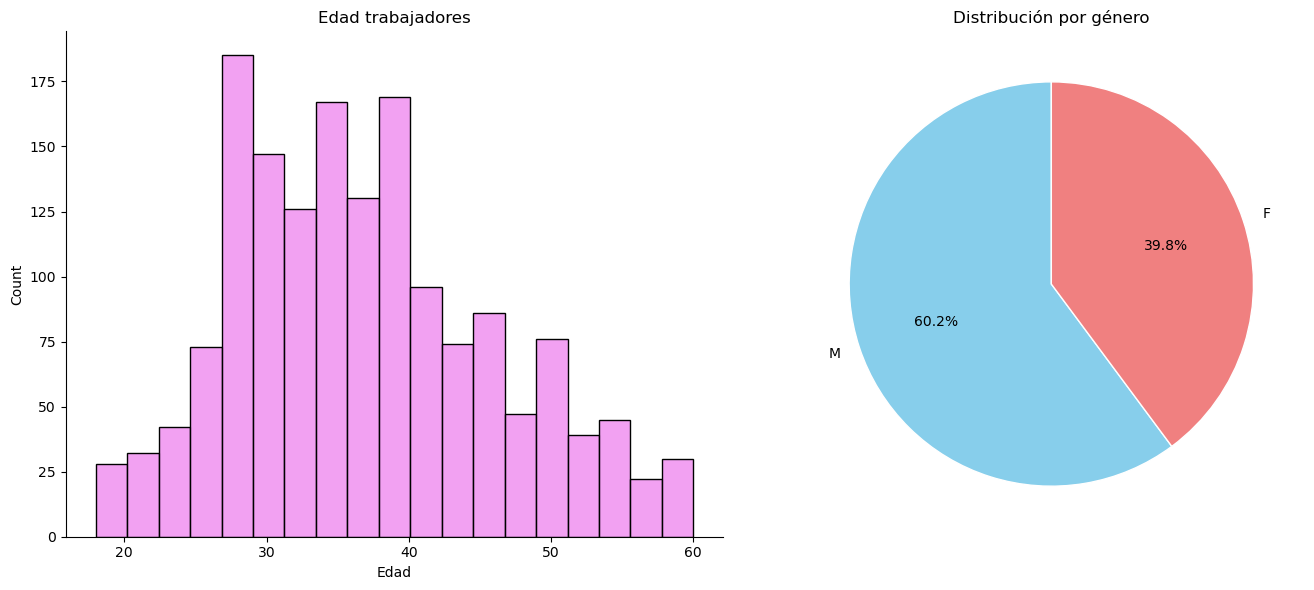

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Histograma de edades en el primer subplot
sns.histplot(data=df, x='age', color='violet', ax=axs[0])
axs[0].set_title('Edad trabajadores')
axs[0].set_xlabel('Edad')
sns.despine(ax=axs[0], top=True, right=True)

# Gráfico de pastel en el segundo subplot
contar_genero = df['gender'].value_counts()
axs[1].pie(contar_genero, 
           labels=contar_genero.index, 
           autopct='%1.1f%%', 
           colors=['skyblue', 'lightcoral'], 
           startangle=90,
           wedgeprops={'edgecolor': 'white'})
axs[1].set_title('Distribución por género')

plt.tight_layout()

La edad media de los trabajadores es de 37 años, con la mayoría concentrada entre los 30 y 40 años. Aunque hay presencia de trabajadores jóvenes alrededor de los 20 años, su número es menor, al igual que el de adultos mayores de 40 años. Sin embargo, la cantidad de empleados que superan los 40 años es mayor que la de los menores de 30, lo que indica una plantilla relativamente joven pero tendiendo hacia la experiencia y madurez.

En cuanto a la distribución por género, predominan los hombres con un 60,2%, frente a un 39,8% de mujeres. Esta diferencia revela una brecha de género significativa que podría estar relacionada con factores estructurales, culturales o de reclutamiento dentro de la empresa. Es importante considerar esta disparidad para fomentar un ambiente más inclusivo y equitativo.

In [15]:
df['age'].mean()

36.92379182156134

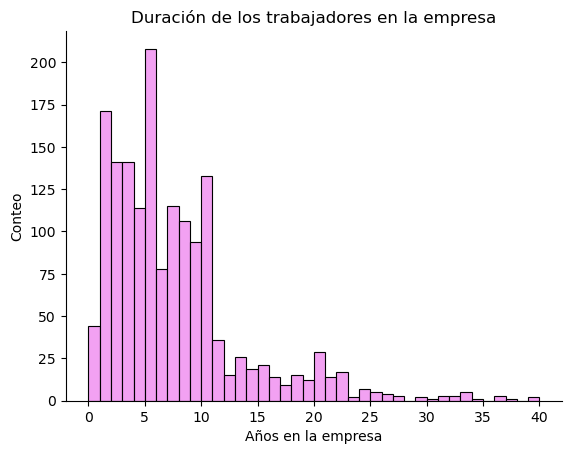

In [5]:
sns.histplot(data=df, x='yearsatcompany', color='violet')
plt.title('Duración de los trabajadores en la empresa')
plt.xlabel('Años en la empresa')
plt.ylabel('Conteo')
sns.despine(top=True, right=True)

La duración promedio de permanencia en la empresa es relativamente baja, con una media de 7 años. Se observa que la mayoría de los empleados llevan entre 0 y 5 años, con un conteo considerablemente bajo en el rango de 11 a 40 años. Además, hay un pico notable en la permanencia alrededor de los 11 años, seguido de una caída pronunciada.

Estas tendencias podrían explicarse por diversas causas como las oportunidades de crecimiento dentro de la empresa o factores personales y externos que influyen en la decisión de permanecer o abandonar.

C:\Users\paula\AppData\Local\Temp\ipykernel_1440\2627626740.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='joblevel', y='monthlyincome', hue='education', ci=None)


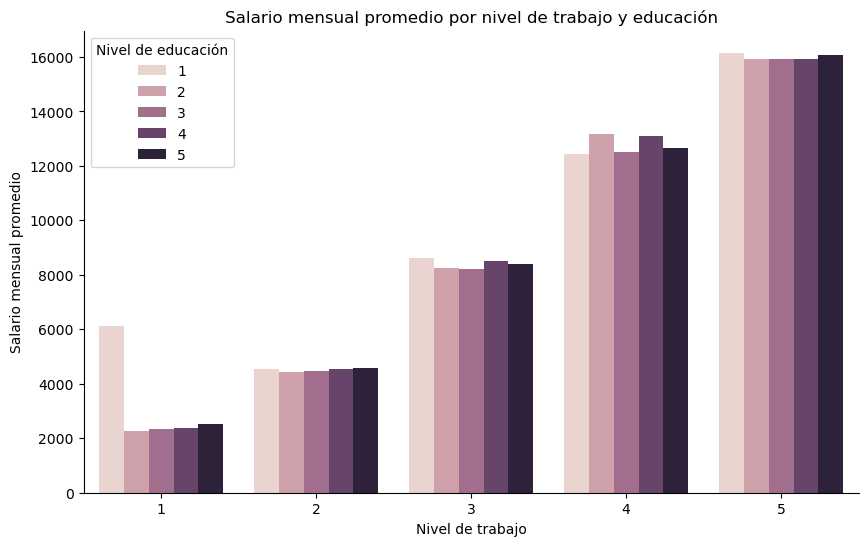

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='joblevel', y='monthlyincome', hue='education', ci=None)
plt.title('Salario mensual promedio por nivel de trabajo y educación')
plt.xlabel('Nivel de trabajo')
plt.ylabel('Salario mensual promedio')
plt.legend(title='Nivel de educación')
sns.despine(top=True, right=True)
plt.show()

Respecto a esta gráfica, podemos observar que el salario promedio aumenta conforme crece el nivel de trabajo de los empleados. Al comparar esto con el nivel educativo, notamos que en el nivel más básico de estudios el salario corresponde al primer nivel de trabajo. Sin embargo, en los niveles superiores de trabajo, la distribución del nivel educativo es bastante equitativa entre los empleados.

Esto sugiere que el aumento salarial y el ascenso en los niveles de trabajo probablemente se relacionan más con la experiencia y desempeño que con el nivel educativo formal.

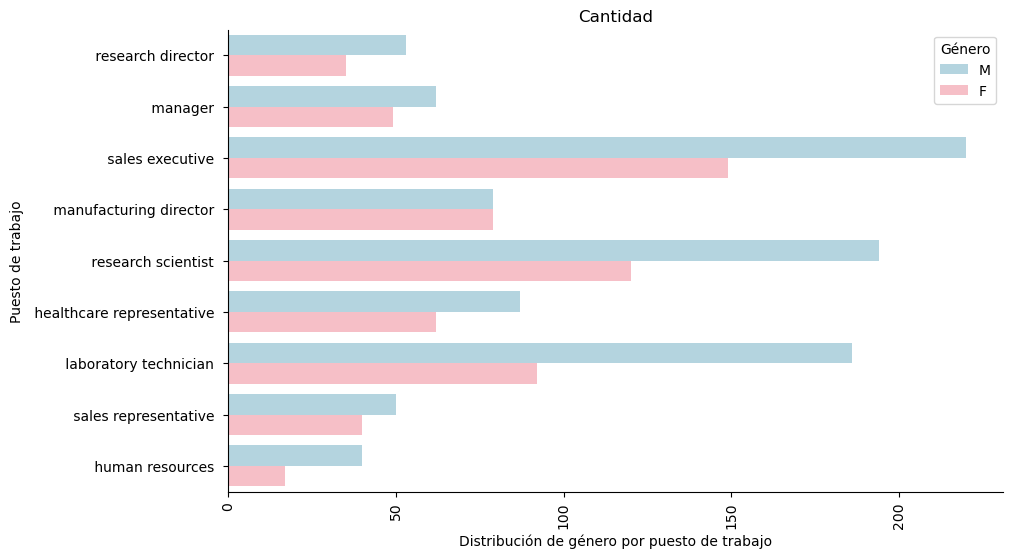

In [13]:
#GENDER Y JOB ROLE
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='jobrole', hue='gender', palette=['lightblue', 'lightpink'])
plt.xticks(rotation=90)
plt.title('Cantidad')
plt.ylabel('Puesto de trabajo')
plt.xlabel('Distribución de género por puesto de trabajo')
plt.legend(title='Género')
sns.despine(top=True, right=True)

Aunque hay más hombres que mujeres en la empresa, la presencia masculina es especialmente alta en cargos como técnico de laboratorio, científico de investigación, ejecutivo de ventas y recursos humanos. En dirección de producción, la representación femenina es más equilibrada, posiblemente gracias a medidas de equidad de género. Sin embargo, en otros puestos de alta dirección siguen predominando los hombres, lo que indica que aún existen retos para lograr igualdad en los niveles superiores.

C:\Users\paula\AppData\Local\Temp\ipykernel_1440\3761625715.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='yearsatcompany', y='attrition', palette=['lightblue', 'lightpink'])


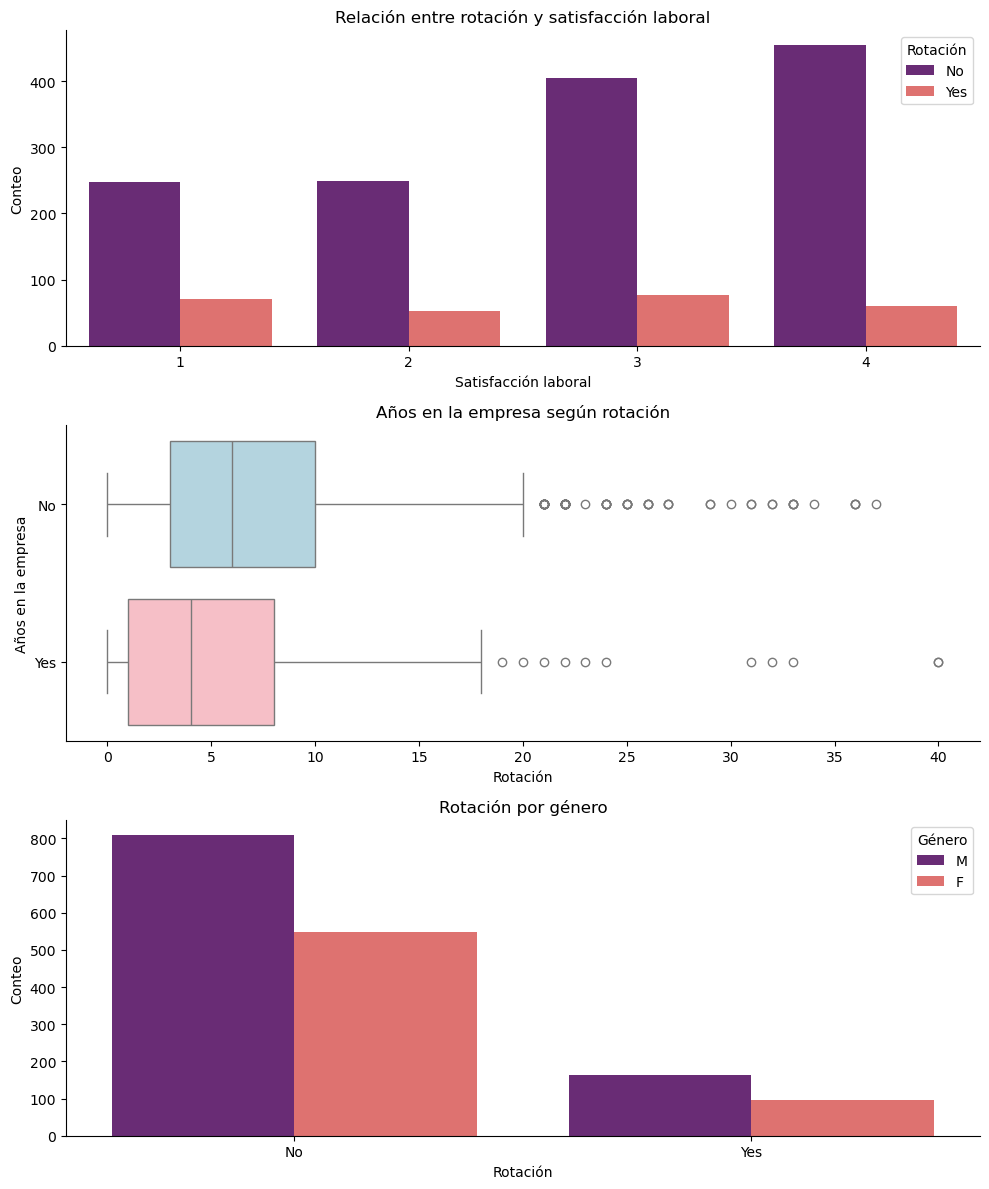

In [7]:
plt.figure(figsize=(10, 12))

# 1. Rotación vs Satisfacción laboral (conteos)
plt.subplot(3, 1, 1)
sns.countplot(data=df, x='jobsatisfaction', hue='attrition', palette='magma')
plt.title('Relación entre rotación y satisfacción laboral')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Conteo')
plt.legend(title='Rotación')
sns.despine(top=True, right=True)

# 2. Boxplot años en la empresa por rotación
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x='yearsatcompany', y='attrition', palette=['lightblue', 'lightpink'])
plt.title('Años en la empresa según rotación')
plt.xlabel('Rotación')
plt.ylabel('Años en la empresa')
sns.despine(top=True, right=True)

# 3. Rotación por género (conteos)
plt.subplot(3, 1, 3)
sns.countplot(data=df, x='attrition', hue='gender', palette='magma')
plt.title('Rotación por género')
plt.xlabel('Rotación')
plt.ylabel('Conteo')
plt.legend(title='Género')
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

Respecto a la rotación de empleados, lo hemos valorado respectoa 3 variables:
Satisfacción laboral:
Los empleados que permanecen en la empresa tienden a tener niveles altos de satisfacción (niveles 3 y 4), aunque también hay presencia en niveles bajos. Entre quienes se van, la satisfacción está repartida en todos los niveles, lo que sugiere que no es un factor decisivo en la rotación.

Años en la empresa:
La media de antigüedad es de 7 años, pero la rotación es alta en los primeros 5 años. Aun así, hay un grupo pequeño con trayectorias largas, incluso de hasta 40 años, lo que indica cierta estabilidad a largo plazo en algunos casos.

Género:
Aunque hay más hombres en la empresa, tanto hombres como mujeres suelen quedarse. Entre quienes se van, hay casi la misma cantidad de ambos, lo que indica que la rotación no está vinculada al género.

C:\Users\paula\AppData\Local\Temp\ipykernel_1440\3949832833.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='age', hue='joblevel', palette='magma', ci=None)


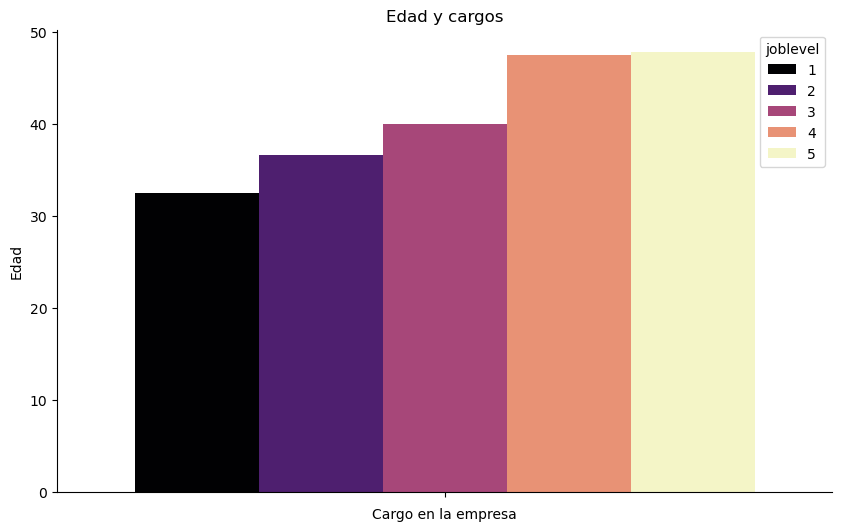

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, y='age', hue='joblevel', palette='magma', ci=None)
plt.xticks(rotation=90)
plt.title('Edad y cargos')
plt.ylabel('Edad') 
plt.xlabel('Cargo en la empresa')
sns.despine(top=True, right=True)

En esta gráfica podemos observar una relación entre la edad y el nivel de cargo: las personas más jóvenes tienden a ocupar puestos de menor nivel, mientras que las personas mayores suelen desempeñar cargos más altos. Esto probablemente se deba a la experiencia laboral acumulada a lo largo del tiempo.

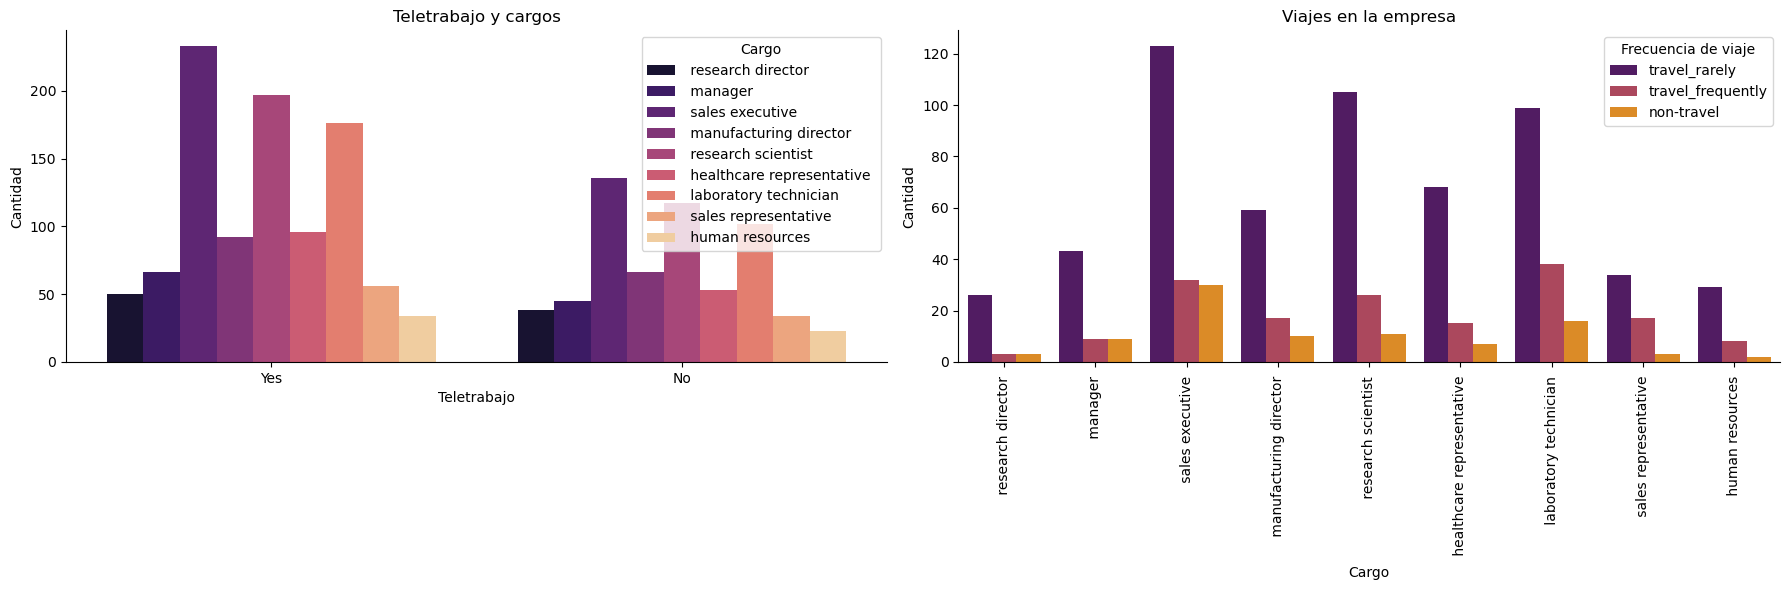

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 fila, 2 columnas

# Primer gráfico: Teletrabajo y cargos
sns.countplot(data=df, x='remotework', hue='jobrole', palette='magma', ax=axes[0])
axes[0].set_title('Teletrabajo y cargos')
axes[0].set_xlabel('Teletrabajo')
axes[0].set_ylabel('Cantidad')
axes[0].legend(title='Cargo')
sns.despine(ax=axes[0], top=True, right=True)

# Segundo gráfico: Viajes en la empresa
sns.countplot(data=df, x='jobrole', hue='businesstravel', palette='inferno', ax=axes[1])
axes[1].set_title('Viajes en la empresa')
axes[1].set_xlabel('Cargo')
axes[1].set_ylabel('Cantidad')
axes[1].legend(title='Frecuencia de viaje')
axes[1].tick_params(axis='x', rotation=90)
sns.despine(ax=axes[1], top=True, right=True)

plt.tight_layout()
plt.show()

Respecto a los cargos en relación con el teletrabajo y los viajes en la empresa, podemos deducir que se trata de una organización que no suele realizar muchos viajes. Los que más viajan con frecuencia son los ejecutivos comerciales, los científicos de investigación (research scientists), los técnicos de laboratorio y los representantes comerciales. El resto de los cargos viaja con menor frecuencia o no viaja.

En cuanto al teletrabajo, especialmente los ejecutivos comerciales, los científicos de investigación y los técnicos de laboratorio —los mismos que viajan más— también son los que más realizan teletrabajo, lo cual tiene sentido dada la naturaleza de sus funciones.